In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize
pd.set_option('display.max_rows', 500)

In [2]:
confirmed_df = pd.read_csv(r'../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [3]:
confirmed_indexed_df = confirmed_df.set_index(['Country/Region'])

In [4]:
confirmed_indexed_df

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,...,47,48,50,50,50,53,59,70,75,82
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,...,360,420,461,502,511,581,639,639,701,773
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,...,117,130,138,150,150,160,178,178,200,212
Nepal,NaN,28.1667,84.2500,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Malaysia,NaN,2.5000,112.5000,0,0,0,3,4,4,4,...,50,83,93,99,117,129,149,149,197,238
Canada,British Columbia,49.2827,-123.1207,0,0,0,0,0,0,1,...,13,21,21,27,32,32,39,46,64,64
Australia,New South Wales,-33.8688,151.2093,0,0,0,0,3,4,4,...,22,26,28,38,48,55,65,65,92,112
Australia,Victoria,-37.8136,144.9631,0,0,0,0,1,1,1,...,10,10,11,11,15,18,21,21,36,49
Australia,Queensland,-28.0167,153.4000,0,0,0,0,0,0,0,...,13,13,13,15,15,18,20,20,35,46


In [5]:
confirmed_arr = confirmed_indexed_df.loc['Israel', :].values[3:]
# confirmed_arr = confirmed_indexed_df.loc['Italy', :].values[3:]
# confirmed_arr = confirmed_indexed_df.loc['Taiwan*', :].values[3:]
confirmed_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 4, 7, 10, 10, 12, 15,
       20, 37, 43, 61, 61, 83, 109, 131, 161, 193], dtype=object)

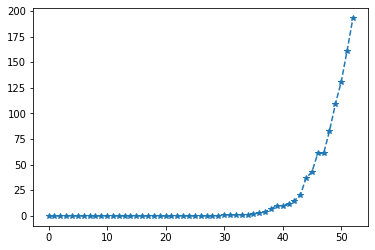

In [6]:
plt.plot(confirmed_arr, '--*')

In [7]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [8]:
y_array_exp = confirmed_arr
x_array = range(len(y_array_exp))

In [9]:
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, y_array_exp)

In [10]:
a, k, b = popt_exponential

In [11]:
estimated = exponential(x_array, a, k, b)
estimated

array([-8.55447940e-01, -8.54911833e-01, -8.54244003e-01, -8.53412087e-01,
       -8.52375767e-01, -8.51084822e-01, -8.49476690e-01, -8.47473437e-01,
       -8.44977981e-01, -8.41869388e-01, -8.37997008e-01, -8.33173179e-01,
       -8.27164127e-01, -8.19678641e-01, -8.10353958e-01, -7.98738186e-01,
       -7.84268400e-01, -7.66243364e-01, -7.43789548e-01, -7.15818792e-01,
       -6.80975575e-01, -6.37571324e-01, -5.83502577e-01, -5.16149051e-01,
       -4.32246654e-01, -3.27729301e-01, -1.97531864e-01, -3.53447050e-02,
        1.66692103e-01,  4.18369685e-01,  7.31884858e-01,  1.12243122e+00,
        1.60893546e+00,  2.21497458e+00,  2.96991851e+00,  3.91035339e+00,
        5.08185465e+00,  6.54119567e+00,  8.35909917e+00,  1.06236645e+01,
        1.34446373e+01,  1.69587276e+01,  2.13362357e+01,  2.67893046e+01,
        3.35822015e+01,  4.20441241e+01,  5.25851550e+01,  6.57161344e+01,
        8.20734167e+01,  1.02449710e+02,  1.27832492e+02,  1.59451864e+02,
        1.98840168e+02])

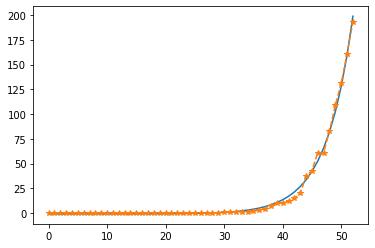

In [12]:
plt.figure()
plt.plot(estimated)
# plt.hold(True)
plt.plot(confirmed_arr, '--*')

<IPython.core.display.Javascript object>


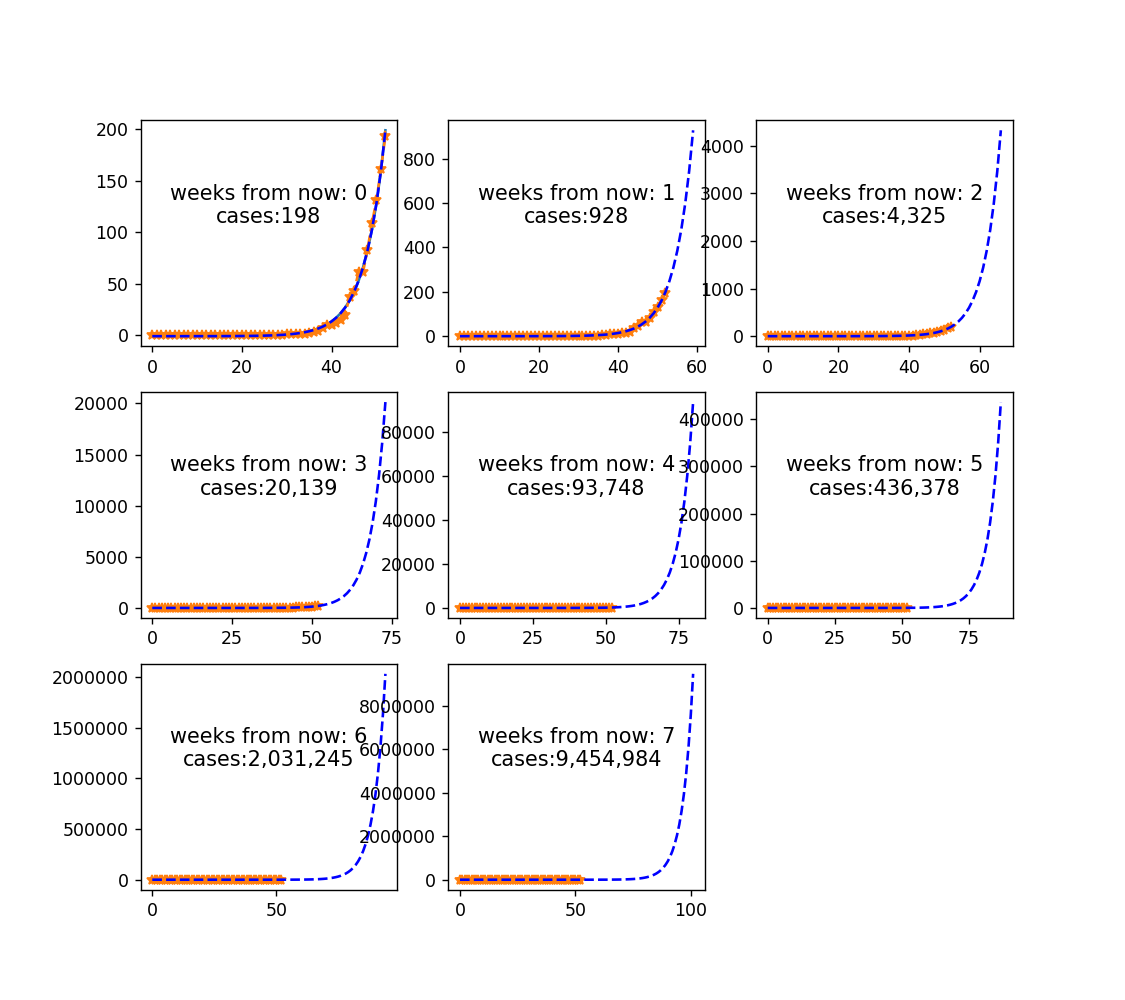

In [13]:
%matplotlib notebook
plt.figure(figsize=(9, 8))
for iteration in range(0, 8):
    plt.subplot(331 + iteration)
    n_days = int(iteration * 7)
    x_long_term = range(len(y_array_exp) + n_days)
    y_forecast = exponential(x_long_term, a, k, b)
    max_val = y_forecast.max() 
    plt.plot(estimated)
    plt.plot(confirmed_arr, '--*')
    plt.plot(y_forecast, '--b')
    plt.title(f'weeks from now: {iteration}\ncases:{int(max_val):,}', y=.5)

In [14]:
a, k, b

(0.0021819439144763727, 0.2196989290489097, -0.8576298838011189)

In [16]:
np.exp(k*7)

4.654770014296629

In [17]:
928. / 198

4.686868686868687

In [18]:
4325 / 928.

4.660560344827586